In [1]:
from cuqi.distribution import DistributionGallery, Gaussian, JointDistribution
from cuqi.testproblem import Poisson1D
from cuqi.problem import BayesianProblem
import cuqi
import inspect
import numpy as np
import matplotlib.pyplot as plt
from cuqi.sampler import MH, CWMH, ULA, MALA, NUTS
import time

import scipy.stats as sps
from scipy.stats import gaussian_kde
import pandas as pd
import cProfile, pstats, io
from pstats import SortKey
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import sys
# Change the current working directory to the root of the project
sys.path.append(os.path.abspath('..'))
import math

# Now you should be able to import the module
from utilities import TableAutomization as TA
from benchmarksClass import _benchmarks as BM



TypeError: Cannot create a consistent method resolution
order (MRO) for bases UserDefinedDistribution, DistributionGallery

In [ ]:
# The donut distribution 
target_ring = BM.Benchmarks(distribution_name ="ring")


In [ ]:
dim = 2
radius, sigma2 = 2.6, 0.033
logpdf_func = 
            #
            logpdf_func = self._donut_logpdf_func
            grad_logpdf = self._donut_grad_logpdf

In [2]:
logpdf_func = lambda x: -0.5 * np.sum(x**2)
gradient_func = lambda x: -x
sample_func = lambda: np.random.randn(2)

# Create an instance of CustomUserDistribution
custom_dist = BM.Benchmarks(dim=2, logpdf_func=logpdf_func, gradient_func=gradient_func, sample_func=sample_func)



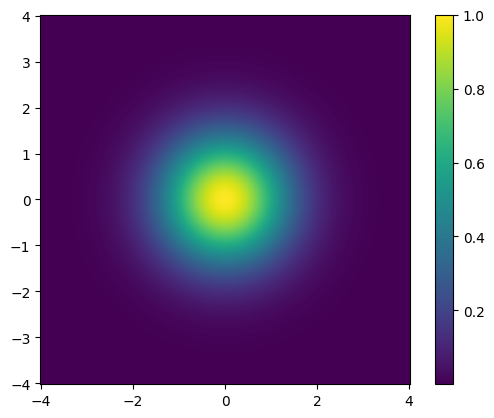

In [3]:
TA.plot_pdf_2D(custom_dist, -4, 4, -4, 4)